In [1]:
import warnings

warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [11]:
data = pd.read_csv('dataset.csv')

In [30]:
print('Tamanho do conjunto de dados:')
print(f'linhas: {data.shape[0]}')
print(f'colunas: {data.shape[1]}')

Tamanho do conjunto de dados:
linhas: 1825
colunas: 11


<font color="red">Essa quantidade restou após a retirada daquelas sequências que só reportavam uma possibilidade na função do peptídeo como, por exemplo, may ou possible inhibitor.</font>

<font color="red">Eu estava pensando em utilizar o docking para incluir tais sequências, porém, essa abordagem também constitui uma tentativa artificial de aumentar a quantidade de dados, já que com a simulação de docking não temos nada mais do que uma hipótese. Na verdade, o modelo deve ser melhor que o docking para identificar os peptídeos, pois não há sentido em criar um modelo se o docking já resolve o problema..
</font>

In [26]:
print('Colunas:')
list(data.columns)

Colunas:


['Entry',
 'PDB',
 'Sequence',
 'Length',
 'kingdom',
 'Organism',
 'DBSOURCE',
 'Protein names',
 'PubMed ID',
 'Function [CC]',
 'ShortFunction']

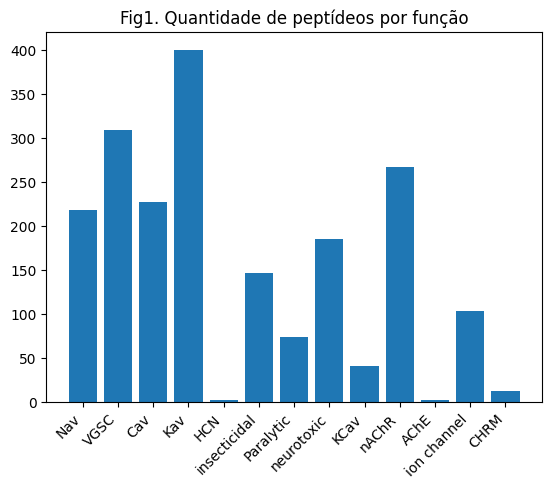

In [27]:
terms = ['Nav', 'VGSC', 'Cav', 'Kav', 'HCN', 'insecticidal', 
         'Paralytic', 'neurotoxic', 'KCav', 'nAChR', 'AChE', 
         'ion channel', 'CHRM', 'HCN']

all = []
for i in terms:

    categories = data[data['ShortFunction'].str.contains(i)]
    count = categories.shape[0]
    all.append(count)

plt.bar(terms, all)

plt.xticks(rotation=45, ha='right')
plt.title('Fig1. Quantidade de peptídeos por função')
plt.show()

Legenda:<br />
<b>Nav</b> = Ação em canais de sódio <br />
<b>VGSC</b> = Ação em canais de Sódio dependentes de voltagem <br />
<b>Cav</b> = Ação em canais de Cálcio <br />
<b>Kav</b> = Ação em canais de potássio <br />
<b>HNC</b> = Ação em canais catiônico não específico dependentes de voltagem <br />
<b>Paralytic</b> = Causa paralisia temporária ou permanente. <br />
<b>Neurotoxic</b> = Provoca evidências da ação em receptores neuronais, por exemplo, paralisia, espasmos e hiperatividade. <br />
<b>KCav</b> = Ação em canais de potássio ativados por cálcio <br />
<b>nAChR</b> = Ação em receptores nicotínicos de acetilcolina <br />
<b>AChE</b> = Ação na enzima acetylcholinesterase <br />
<b>Ion channel</b> = Ação em canais iônicos <br />
<b>CHRM</b> = Ação em receptores muscarínicos de acetilcolina <br />
<b>Insecticidal</b> = Ação insecticida

<font color="red">Apesar de temos uma boa quantidade de sequências que atuam em canais de sódio (Nav + VGSC), nem todas atuam em insetos, como mostra a figura 3.</font>

In [14]:
terms = ['Nav', 'VGSC', 'Cav', 'Kav', 'HCN', 
         'Paralytic', 'neurotoxic', 'KCav', 'nAChR', 'AChE', 
         'ion channel', 'CHRM', 'HCN']

neurotox = []
for t in terms:
    for i in range(len(data)):
        if t in data.ShortFunction[i]:
            if i not in neurotox:
                neurotox.append(i)

neurotoxset = data.iloc[sorted(neurotox)]

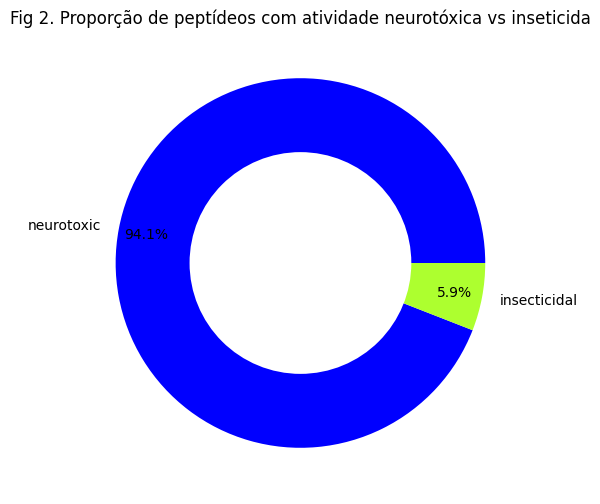

In [28]:
neurotx = neurotoxset.shape[0]
insecticidal = data[data['ShortFunction'].str.contains('^insecticidal$')].shape[0]

labels = ['neurotoxic', 'insecticidal']
prop = [neurotx, insecticidal]

colors = ['#0000FF', '#ADFF2F', '#FFA500']

# explosion
explode = (0.05, 0.05, 0.05)
 
# Pie Chart
fig, ax = fig, ax = plt.subplots(figsize=(12, 6))

ax.pie(prop, colors=colors, labels=labels,
        autopct='%1.1f%%', pctdistance=0.85)

# draw circle
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
plot = plt.gcf()
 
# Adding Circle in Pie chart
plot.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Fig 2. Proporção de peptídeos com atividade neurotóxica vs inseticida')

plt.show()

<font color="red"><b>neurotoxic (1715 sequências): todos que apresentam atividade em receptores nervosos e com envidencia de neurotoxicidade, apresentados na figura 1.</b></font>

In [7]:
insect, others = [], []
for i in neurotoxset.ShortFunction:

    if 'insect' in i:
        insect.append(i)
    else:
        others.append(i)
    

In [8]:
def channel(sets):
    
    nav = 0
    vgsc = 0
    others = 0

    for i in sets:
        if 'Nav' in i and 'VGSC' not in i:
            nav += 1
        elif 'VGSC' in i:
            vgsc += 1
        else:
            others += 1

    channels = {
        'Nav': nav,
        'VGSC': vgsc,
        'others_channels': others
        }
    return channels

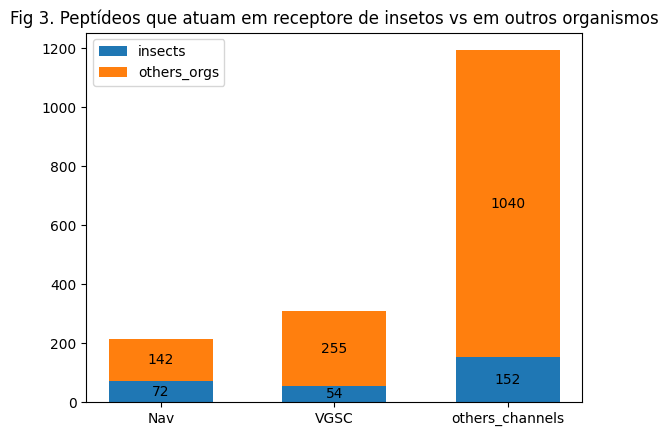

In [29]:
insect_channels = channel(insect)
others_org_channels = channel(others)

channels = ['Nav','VGSC', 'others_channels']
organism = {'insects': list(insect_channels.values()),
            'others_orgs': list(others_org_channels.values())
           }

width = 0.6

fig, ax = plt.subplots()
bottom = np.zeros(3)

for org, count in organism.items():
    p = ax.bar(channels, count, width, label=org, bottom=bottom)
    bottom += count

    ax.bar_label(p, label_type='center')

ax.set_title('Fig 3. Peptídeos que atuam em receptore de insetos vs em outros organismos')
ax.legend()

plt.show()

Legenda:<br />
<b>Nav</b> = Ação em canais de sódio <br />
<b>VGSC</b> = Ação em canais de Sódio dependentes de voltagem <br />
<b>others_channels</b> = Outros canais iônicos (especificados na fig 1) <br />
<b>others_orgs</b> = Outros organismos, pórem há sequências que atuam em um amplo espectro. Há também aquelas em que o organismo não é especificado.

## Possíveis modelos

- Pode ser criado um modelo de otimização utilizando as pontuações de docking e IA generativa com as sequências com atividade inseticida ou com aquelas que agem nos canais de sódio de insetos.
- Ou um modelo de classificação de peptídeos neurotóxico utilizando aquelas 1715 sequências com atividade neurotóxica e depois fazer experimentos de docking com os melhores resultados do modelo.
- Ou podemos tentar treinar um modelo de classificação com as sequências específicas que agem nos canais de sódio (Nav ou VGSC) de insetos. Há modelos ajustados para uma pequena quantidade de dados.
